In [23]:
import sympy as sp
from dtumathtools import *
sp.init_printing()
from sympy.solvers.solveset import linsolve
import math as math

# `Assignment 2`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
fname_2290 = r'/Users/Raphael/Documents/GitHub_repositories/Hydrology-group-8/hydrology-group-8/Assignment_2/Assignment_2_data/produkt_pkt_aero_20210101_20211229_02290.txt'
fname_4466 = r'/Users/Raphael/Documents/GitHub_repositories/Hydrology-group-8/hydrology-group-8/Assignment_2/Assignment_2_data/produkt_pkt_aero_20210101_20211231_04466.txt'

data_2290 = pd.read_csv(fname_2290,delimiter = ';')
data_4466 = pd.read_csv(fname_4466,delimiter = ';')

data_2290 = data_2290.replace(-999,np.nan)
data_4466 = data_4466.replace(-999,np.nan)

In [12]:
date = 2021010406
day_data_2290 = data_2290.loc[data_2290['MESS_DATUM'] == date]
date = 2021010400
day_data_4466 = data_4466.loc[data_4466['MESS_DATUM'] == date]

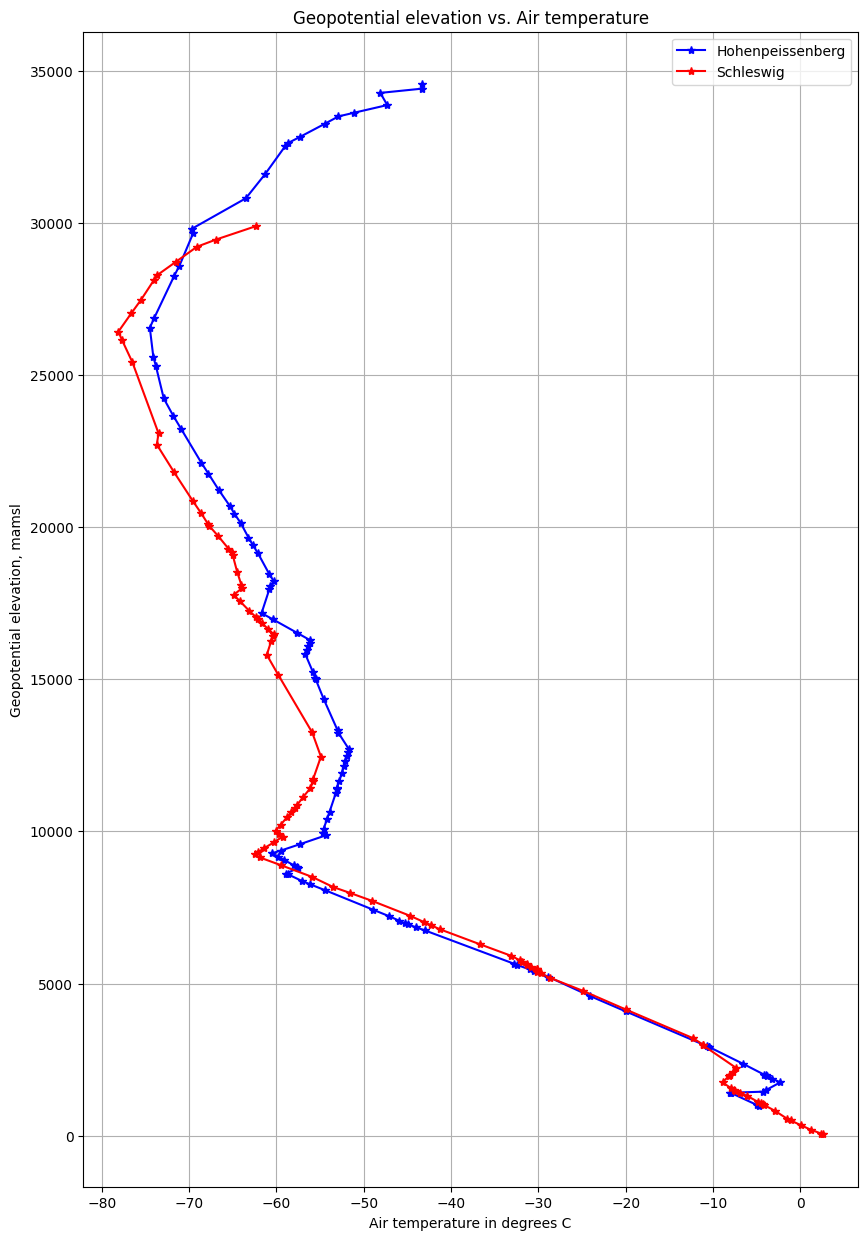

In [20]:
plt.figure(figsize=(10,15))
plt.plot(day_data_2290['AET'],day_data_2290['AEH'],'b-*')
plt.plot(day_data_4466['AET'],day_data_4466['AEH'],'r-*')
plt.xlabel('Air temperature in degrees C')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Air temperature')
plt.grid('Below')


In [ ]:
plt.figure(figsize=(10,15))
plt.plot(day_data_2290['AET'],day_data_2290['AEH'],'b-*')
plt.plot(day_data_4466['AET'],day_data_4466['AEH'],'r-*')
plt.xlabel('Air temperature in degrees C')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Air temperature')
plt.grid('Below')

# 4)

## water vapor density

First find `e = water vapour pressure`:



$e^*(T)=611*10^{\frac{7.5(T-273.15)}{T-35.85}}$

In [73]:
# transforming the csv data for temperature into a numpy array
T2290 = day_data_2290['AET'].to_numpy()
T4466 = day_data_4466['AET'].to_numpy()

# computing water vapour in [mb] pressure to an array
water_vapour_pressure2290 = 611 * 10 ** ((7.5 * (T2290)) / (T2290 +273.15 - 35.85))
water_vapour_pressure4466 = 611 * 10 ** ((7.5 * (T4466)) / (T4466 +273.15 - 35.85))

And now we can compute the `water vapour density` with $ρ_v$ [g/m^3] $= \frac{0.622 * e}{R_{da}*T}$:

With $e$ = water vapor pressure, $R_{da}$=Ideal gas constant for dry air and $T$ = temperature.

In [74]:
# water vapour density in [g/m^3]
Rda = 287 # [JKG^-1K^-1]

water_vapour_density2290 = (0.622 * water_vapour_pressure2290) / (Rda * (T2290+273.15))
water_vapour_density4466 = (0.622 * water_vapour_pressure4466) / (Rda * (T4466+273.15))


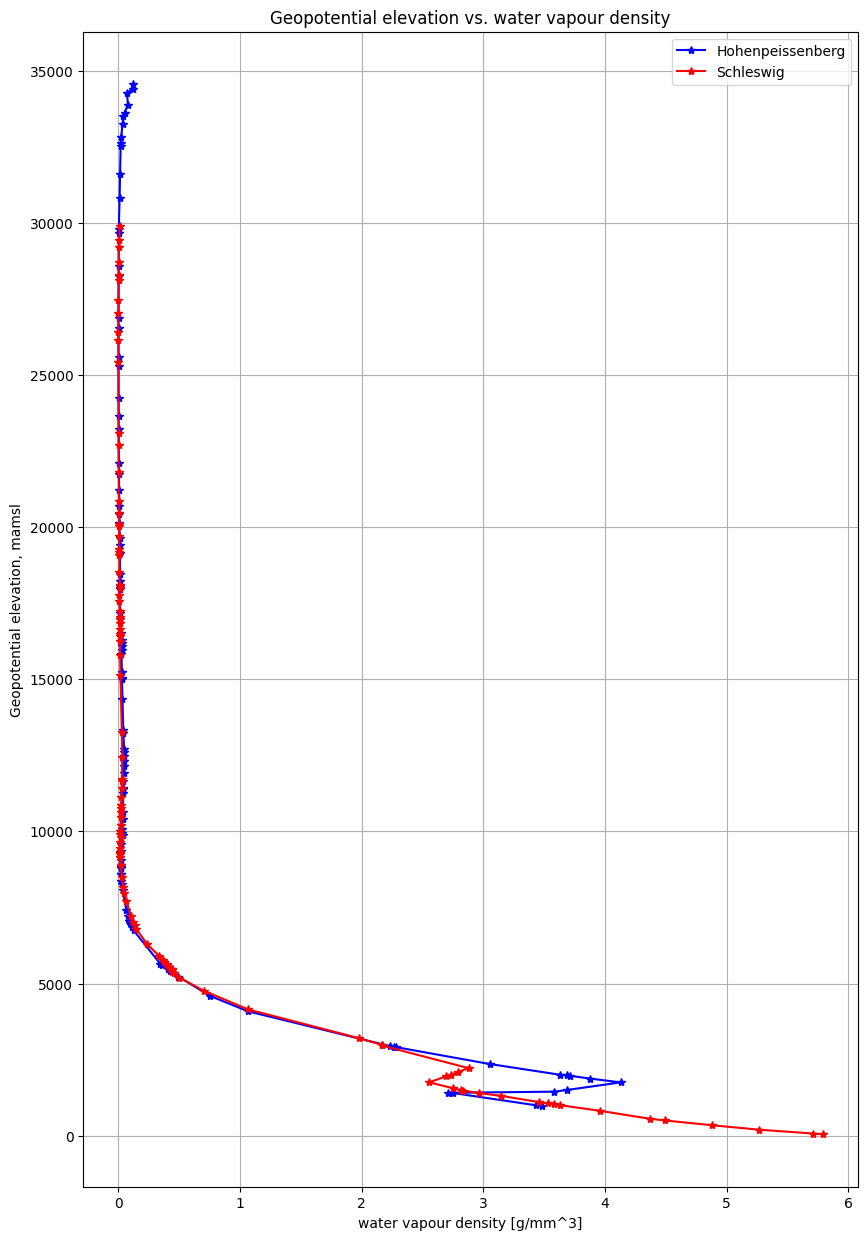

In [75]:
plt.figure(figsize=(10,15))
plt.plot(water_vapour_density2290*1000,day_data_2290['AEH'],'b-*') # to get it in [g/mm^3]
plt.plot(water_vapour_density4466*1000,day_data_4466['AEH'],'r-*') # to get it in [g/mm^3]
plt.xlabel('water vapour density [g/mm^3]')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. water vapour density')
plt.grid('Below')

## Dry air density

`mixing ratio` = $mr = \frac{0.622*e}{p},$

with p = total (moist) air pressure which is given and we already calculated e.

In [77]:
# air pressure
air_pressure2290 = day_data_2290['AEP'].to_numpy()
air_pressure4466 = day_data_4466['AEP'].to_numpy()


# mixing ratio
mixing_ratio2290 = (0.622*water_vapour_pressure2290) / air_pressure2290
mixing_ratio4466 = (0.622*water_vapour_pressure4466) / air_pressure4466


`dry air density` [kg/m^3] = $ρ_{da}= \frac{ρ_v}{mr}$

In [79]:
dry_air_density2290 = water_vapour_density2290/mixing_ratio2290
dry_air_density4466 = water_vapour_density4466/mixing_ratio4466

plotting:

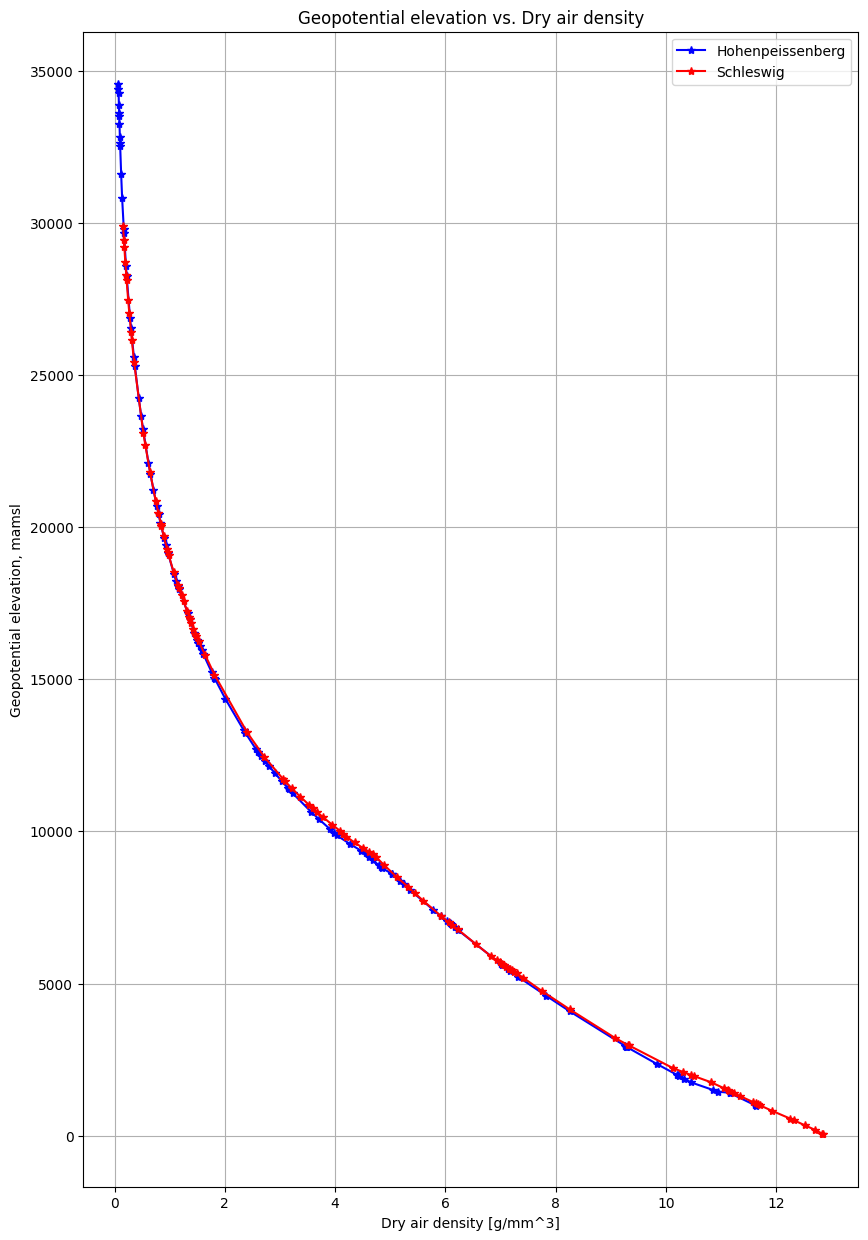

In [81]:
plt.figure(figsize=(10,15))
plt.plot(dry_air_density2290*1000,day_data_2290['AEH'],'b-*') # to get it in [g/mm^3]
plt.plot(dry_air_density4466*1000,day_data_4466['AEH'],'r-*') # to get it in [g/mm^3]
plt.xlabel('Dry air density [g/mm^3]')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Dry air density')
plt.grid('Below')